### Install library

In [ ]:
!pip -q install pytube
!pip -q install -U kora
!pip -q install bing-image-downloader

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageDraw
import pandas as pd

### Download image dataset

In [3]:
#โหลดให้แล้ว 
#from bing_image_downloader import downloader
#query_string= 'alpaca'
#downloader.download(query_string, limit=30,  output_dir='dataset',
#adult_filter_off=True, force_replace=False, timeout=60)


## **For making bounding box**

https://www.makesense.ai/

### Show image with bounding box

In [2]:
name = 'Image_11'
with open("dataset/label_alpaca/" + name + ".txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        line = line.rstrip().split(' ')[1:]
        print(line)

['0.203579', '0.465051', '0.407158', '0.878241']
['0.651945', '0.503946', '0.443912', '0.827508']
['0.870096', '0.428974', '0.254510', '0.700113']
['0.733963', '0.160090', '0.198703', '0.290868']
['0.362345', '0.335964', '0.307779', '0.529876']
['0.170406', '0.164036', '0.120068', '0.280722']
['0.218602', '0.140361', '0.229989', '0.249154']
['0.190276', '0.118377', '0.124295', '0.236753']
['0.120096', '0.048478', '0.110767', '0.096956']


#### OpenCV

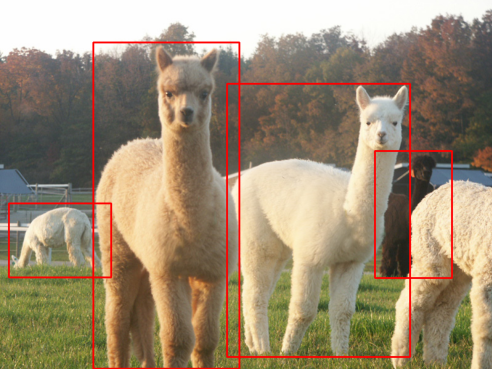

In [3]:
import cv2
import matplotlib.pylab as plt
name = 'Image_12'
image = cv2.imread("dataset/alpaca/"+name+".jpg")
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
with open("dataset/label_alpaca/" + name + ".txt", "r") as f:
    lines = f.readlines()
    for line in lines:
        f = line.rstrip().split(' ')[1:]
        h,w,_ =image.shape
        #print(w,h)

        start_point = ((float(f[0])-float(f[2])/2)*w, (float(f[1])-float(f[3])/2)*h,0)
        end_point= ((float(f[0])+float(f[2])/2)*w,(float(f[1])+float(f[3])/2)*h,0)
        image = cv2.rectangle(image,(int(round(start_point[0],0)),int(round(start_point[1],0))),(int(round(end_point[0],0)),int(round(end_point[1],0))),(255,0,0),2)

plt.axis(False)
plt.rcParams['savefig.pad_inches'] = 0
plt.imshow(image)

# Displaying the image
# cv2.imshow('img',image)

# ultralytics Pipeline
#### RT-DETR: A Vision Transformer-Based Real-Time Object Detector
https://docs.ultralytics.com/models/rtdetr/

# structure for YOLO

In [8]:
#structure
'''
datset
|
|---dataset.yaml
|
|---images (.jpg)
|    |
|    |--train
|    |--val
|
|--- labels (.txt)
|    |
|    |--train
|    |--val

'''
print('structure')

structure


In [15]:
os.makedirs( "dataset/images")
os.makedirs( "dataset/images/train")
os.makedirs( "dataset/images/val")
os.makedirs( "dataset/labels")
os.makedirs( "dataset/labels/train")
os.makedirs( "dataset/labels/val")

In [16]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.DataFrame({'Image': os.listdir('dataset/alpaca')})
df.head()

,Image
0,Image_1.jpg
1,Image_10.jpg
2,Image_11.jpg
3,Image_12.jpg
4,Image_13.jpg


In [17]:
df['label'] = df['Image'].apply(lambda x : x[:-4]+'.txt')
df.head()

,Image,label
0,Image_1.jpg,Image_1.txt
1,Image_10.jpg,Image_10.txt
2,Image_11.jpg,Image_11.txt
3,Image_12.jpg,Image_12.txt
4,Image_13.jpg,Image_13.txt


In [18]:
df_train , df_val = train_test_split(df, test_size=0.1, random_state=42)  ## 0.1 -> 10%
print(len(df_train),len(df_val))
df_val

27 3


,Image,label
27,Image_7.jpg,Image_7.txt
15,Image_23.jpg,Image_23.txt
23,Image_30.jpg,Image_30.txt


In [19]:
import shutil

path_old_img = 'dataset/alpaca/'
path_new_img = 'dataset/images/'
path_old_txt = 'dataset/label_alpaca/'
path_new_txt = 'dataset/labels/'
def create_data(df,mode='train') :

    for image_ in df['Image'] :
        '''copy image'''
        shutil.copy(path_old_img+image_, path_new_img+mode+'/'+image_)

        '''copy txt'''
        try:
            shutil.copy(path_old_txt+image_[:-3]+'txt', path_new_txt+mode+'/'+image_[:-3]+'txt')
        except:
            pass



create_data(df_train,mode='train')
create_data(df_val,mode='val')

Install ultralytics Ver.Dev

In [4]:
import os
!git clone https://github.com/ultralytics/ultralytics
os.chdir('ultralytics')
!pip install -e .
# os.chdir('/content')

Cloning into 'ultralytics'...


Obtaining file:///C:/Users/trueh/Downloads/object-detection/ultralytics
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached torch-2.0.1-cp310-cp310-win_amd64.whl (172.3 MB)
  Using cached torchvision-0.15.2-cp310-cp310-win_amd64.whl (1.2 MB)
  Running setup.py develop for ultralytics


In [15]:
print (os.getcwd())
os.chdir("../")
#print (os.getcwd())

C:\Users\trueh\Downloads\object-detection


In [24]:
model.train(
    data = "dataset/dataset.yaml", #
    epochs = 20,
    batch = -1, # -1 Auto Batch size

    )

Ultralytics YOLOv8.0.121  Python-3.10.11 torch-2.0.1+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=None, data=dataset/dataset.yaml, epochs=20, patience=50, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=False, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, wo

       5/20         0G     0.3328      3.071     0.3154         46        640: 100%|██████████| 2/2 [05:51<00:00, 175.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.28s/it]
                   all          3          6     0.0145          1     0.0377     0.0197

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       6/20         0G     0.3506      2.243     0.3974         41        640: 100%|██████████| 2/2 [05:27<00:00, 163.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.65s/it]
                   all          3          6      0.105      0.167      0.265      0.181

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size
       7/20         0G     0.3244      1.613     0.3617         48        640: 100%|██████████| 2/2 [06:20<00:00, 190.50s/it]
              

In [ ]:
# # Download zip file
# from google.colab import files
# files.download("/content/ultralytics/runs/detect/train/weights/best.pt")


In [ ]:
#load trained model
from ultralytics import RTDETR
model_finetune = RTDETR('best.pt')

### Predict Test


image 1/1 C:\Users\trueh\Downloads\object-detection\dataset\images\val\Image_7.jpg: 640x640 4 alpacas, 2101.9ms
Speed: 10.9ms preprocess, 2101.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\Users\trueh\Downloads\object-detection\ultralytics\runs\detect\predict3


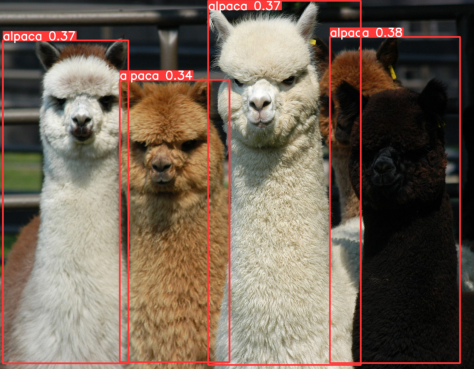

In [27]:
image_path='dataset/images/val/Image_7.jpg'
pred = model_finetune.predict(image_path, conf=0.3,max_det=100)[0]


res_plotted = pred.plot()

plt.axis(False)
plt.rcParams['savefig.pad_inches'] = 0
plt.imshow(cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB))


In [28]:
pred.boxes

WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[1.2869e+01, 1.7824e+02, 5.5354e+02, 1.5717e+03, 3.7312e-01, 0.0000e+00],
        [8.9797e+02, 7.1722e+00, 1.5559e+03, 1.5787e+03, 3.6829e-01, 0.0000e+00],
        [1.4222e+03, 1.6391e+02, 1.9838e+03, 1.5701e+03, 3.8069e-01, 0.0000e+00],
        [5.1692e+02, 3.4805e+02, 9.9000e+02, 1.5662e+03, 3.3816e-01, 0.0000e+00]])
cls: tensor([0., 0., 0., 0.])
conf: tensor([0.3731, 0.3683, 0.3807, 0.3382])
data: tensor([[1.2869e+01, 1.7824e+02, 5.5354e+02, 1.5717e+03, 3.7312e-01, 0.0000e+00],
        [8.9797e+02, 7.1722e+00, 1.5559e+03, 1.5787e+03, 3.6829e-01, 0.0000e+00],
        [1.4222e+03, 1.6391e+02, 1.9838e+03, 1.5701e+03, 3.8069e-01, 0.0000e+00],
        [5.1692e+02, 3.4805e+02, 9.9000e+02, 1.5662e+03, 3.3816e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (1596, 2048)
shape: torch.Size([4, 6])
xywh: tensor([[ 283.2051,  874.9790,  540.6718, 1393.4795],
        [1226.9141,  792.9393,  657.8977, 1571.5341],

In [32]:
video_path='USE/alpaca-short.mp4'
#video_path='alpaca.mp4'
pred = model_finetune.predict(video_path, conf=0.20,max_det=100)



    WARNING  stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 6 alpacas, 2003.6ms
video 1/1 (2/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 6 alpacas, 2061.1ms
video 1/1 (3/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 6 alpacas, 2091.1ms
video 1/1 (4/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 6 alpacas, 2052.2ms
video 1/1 (5/3190) C:\Users\trueh\Downloads\object-detect

video 1/1 (77/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 4 alpacas, 2037.5ms
video 1/1 (78/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 3 alpacas, 2073.3ms
video 1/1 (79/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 6 alpacas, 2069.8ms
video 1/1 (80/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 6 alpacas, 2032.3ms
video 1/1 (81/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 4 alpacas, 2076.6ms
video 1/1 (82/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 4 alpacas, 2026.5ms
video 1/1 (83/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 6 alpacas, 1998.5ms
video 1/1 (84/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 5 alpacas, 2052.8ms
video 1/1 (85/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 4 alpacas, 2097.0ms
video 1/1 (86/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 

video 1/1 (157/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 12 alpacas, 2045.3ms
video 1/1 (158/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 13 alpacas, 2101.5ms
video 1/1 (159/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 17 alpacas, 2048.4ms
video 1/1 (160/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 25 alpacas, 2040.0ms
video 1/1 (161/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 19 alpacas, 1972.9ms
video 1/1 (162/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 20 alpacas, 2077.6ms
video 1/1 (163/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 19 alpacas, 1989.1ms
video 1/1 (164/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 16 alpacas, 2048.0ms
video 1/1 (165/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 17 alpacas, 2100.2ms
video 1/1 (166/3190) C:\Users\trueh\Downloads\object-detection\a

video 1/1 (236/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 18 alpacas, 2112.7ms
video 1/1 (237/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 17 alpacas, 2030.7ms
video 1/1 (238/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 13 alpacas, 2013.3ms
video 1/1 (239/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 14 alpacas, 2046.4ms
video 1/1 (240/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 14 alpacas, 2070.2ms
video 1/1 (241/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 11 alpacas, 2149.2ms
video 1/1 (242/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 9 alpacas, 2067.1ms
video 1/1 (243/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 10 alpacas, 2057.0ms
video 1/1 (244/3190) C:\Users\trueh\Downloads\object-detection\alpaca.mp4: 640x640 8 alpacas, 2072.2ms
video 1/1 (245/3190) C:\Users\trueh\Downloads\object-detection\alp

### For openCV

In [30]:
# Open the video fileUSE
video_path = 'USE/alpaca-short.mp4'
#video_path = 'USE/alpaca.mp4'
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        # print(frame)
        results = model_finetune(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2.imshow("YOLOv8 Inference", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# # Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()



0: 640x640 (no detections), 2091.4ms
Speed: 13.6ms preprocess, 2091.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\Users\trueh\Downloads\object-detection\ultralytics\runs\detect\predict3

0: 640x640 (no detections), 2130.8ms
Speed: 8.5ms preprocess, 2130.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\Users\trueh\Downloads\object-detection\ultralytics\runs\detect\predict3

0: 640x640 (no detections), 1672.2ms
Speed: 9.1ms preprocess, 1672.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\Users\trueh\Downloads\object-detection\ultralytics\runs\detect\predict3

0: 640x640 (no detections), 1213.9ms
Speed: 8.5ms preprocess, 1213.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\Users\trueh\Downloads\object-detection\ultralytics\runs\detect\predict3

0: 640x640 (no detections), 1227.1ms
Speed: 9.0ms preprocess, 1227.1ms inference, 


0: 640x640 1 alpaca, 1372.3ms
Speed: 7.0ms preprocess, 1372.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\Users\trueh\Downloads\object-detection\ultralytics\runs\detect\predict3

0: 640x640 (no detections), 1348.7ms
Speed: 2.2ms preprocess, 1348.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\Users\trueh\Downloads\object-detection\ultralytics\runs\detect\predict3

0: 640x640 (no detections), 1225.8ms
Speed: 4.3ms preprocess, 1225.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\Users\trueh\Downloads\object-detection\ultralytics\runs\detect\predict3

0: 640x640 (no detections), 1222.0ms
Speed: 5.6ms preprocess, 1222.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\Users\trueh\Downloads\object-detection\ultralytics\runs\detect\predict3

0: 640x640 (no detections), 1202.7ms
Speed: 7.2ms preprocess, 1202.7ms inference, 0.0ms po

Results saved to C:\Users\trueh\Downloads\object-detection\ultralytics\runs\detect\predict3

0: 640x640 2 alpacas, 2164.0ms
Speed: 4.3ms preprocess, 2164.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\Users\trueh\Downloads\object-detection\ultralytics\runs\detect\predict3

0: 640x640 2 alpacas, 2205.8ms
Speed: 14.5ms preprocess, 2205.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\Users\trueh\Downloads\object-detection\ultralytics\runs\detect\predict3

0: 640x640 2 alpacas, 1975.7ms
Speed: 15.8ms preprocess, 1975.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\Users\trueh\Downloads\object-detection\ultralytics\runs\detect\predict3

0: 640x640 2 alpacas, 2016.1ms
Speed: 10.0ms preprocess, 2016.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to C:\Users\trueh\Downloads\object-detection\ultralytics\runs\detect\predict3

0: 640x640 1

In [2]:
names= {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}

In [4]:
import cv2
#from ultralytics import YOLO
#model = YOLO('yolov8n.pt') 
from ultralytics import RTDETR
model = RTDETR('rtdetr-l.pt')
video_path = "cars.mp4"
#video_path = "USE/alpaca-short.mp4"
cap = cv2.VideoCapture(video_path)

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object
output_path = "output.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Choose the appropriate codec for your system (e.g., 'XVID' for AVI)
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))


# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        results = model(frame)
        results[0].names=names
        annotated_frame = results[0].plot()
        out.write(annotated_frame)

        # Display the annotated frame
        cv2.imshow("YOLOv8 Inference", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
out.release()
cv2.destroyAllWindows()



0: 640x640 8 0s, 9 2s, 1 5, 4 7s, 7742.4ms
Speed: 109.8ms preprocess, 7742.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 0s, 9 2s, 1 5, 4 7s, 1617.5ms
Speed: 14.7ms preprocess, 1617.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 0s, 9 2s, 1 5, 4 7s, 1695.4ms
Speed: 14.5ms preprocess, 1695.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 9 0s, 9 2s, 1 5, 4 7s, 1612.7ms
Speed: 10.6ms preprocess, 1612.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 0s, 9 2s, 1 5, 3 7s, 1494.6ms
Speed: 12.1ms preprocess, 1494.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 8 0s, 9 2s, 1 5, 4 7s, 1309.0ms
Speed: 5.5ms preprocess, 1309.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 7 0s, 10 2s, 1 5, 4 7s, 1392.4ms
Speed: 6.1ms preprocess, 1392.4ms inference, 0.0ms postprocess per image at shape (1, 3, 64